In [21]:
import numpy as np
import matplotlib.pyplot as plt

### overleaf

In [22]:
txt = "56.03 ± 0.40 54.29 ± 0.73 54.23 ± 1.26 52.13 ± 0.19"

x = txt.split(" ")


mean = [x[0], x[3], x[6], x[9]]
sd   = [x[2], x[5], x[8], x[11]]

mean = [float(x) for x in mean] 
sd   = [float(x) for x in sd] 

print(mean)
print(sd)

[56.03, 54.29, 54.23, 52.13]
[0.4, 0.73, 1.26, 0.19]


## Table - cifar10_niid2_0.8a_0.2b_fedavg_partitions
partitions: (100, 200, 400, 800)

In [23]:
# $ 55.85 \pm 1.37 $ & $ 54.83 \pm 0.65 $ & $ 55.28 \pm 1.02 $ 52.73 ± 0.53
## For IID   v 52.73 ± 0.53
# r1_av = [55.85, 54.83, 55.28, 52.73]
# r1_sd = [1.37, 0.65, 1.02, 0.53]

# r2_av = [59.92, 47.24, 55.28, 52.73]
# r2_sd = [0.02, 0.62, 1.02, 0.53]

## For Dir02 v 48.75 ± 0.72
r1_av = [56.03, 54.29, 54.23, 52.13]
r1_sd = [0.4, 0.73, 1.26, 0.19]

# r2_av = [54.42, 47.75, 52.41, 48.75]
# r2_sd = [0.88, 0.88, 1.27, 0.72]

# r3_av = [41.13, 28.56, 35.93, 35.84]
# r3_sd = [0.78, 1.32, 1.21, 1.13]

# r4_av = [35.96, 28.4, 31.8, 31.16]
# r4_sd = [1.78, 0.49, 1.13, 1.09]

In [24]:
table_av = [r1_av]
table_sd = [r1_sd]

table_av = np.array(table_av)
table_sd = np.array(table_sd)

In [25]:
table_av

array([[56.03, 54.29, 54.23, 52.13]])

## Plots

In [26]:
font = {'family': 'serif',
        'weight': 'normal',
        }
fontsize_axes   = 12 # axes fontsize
fontsize_legend = 11 # legend fontsize
# legend_properties = {'weight':'bold'}

# x_label = ["0.516", "0.012"]
# x_label = ["Data", "Client"]
x_label = [""]
y_min   = 35
y_max   = 65
y_step  = 5

color_bar1 = 'darkturquoise'
color_bar2 = 'slateblue'
color_bar3 = 'palegreen'
color_bar4 = 'darkgrey'

In [27]:
def make_fig_bar(mean, sd, name):
    
    fig, ax = plt.subplots(figsize =(9.5, 7.5), nrows=1, sharex=True)
    
    N = 1
    ind = np.arange(N) 
    width = 0.2

    print()
    
    bar1 = ax.bar(ind, mean[:, 0], yerr=sd[:, 0], width=width, 
                  label="CC+DC", color=color_bar1, capsize=3)
    
    bar2 = ax.bar(ind+width, mean[:, 1], yerr=sd[:, 1], width=width, 
                  label="DC", color=color_bar2, capsize=3)
    
    bar3 = ax.bar(ind+width*2, mean[:, 2], yerr=sd[:, 2], width=width, 
                   label="CC", color=color_bar3, capsize=3)
    
    bar4 = ax.bar(ind+width*3, mean[:, 3], yerr=sd[:, 3], width=width, 
                   label="Vanilla", color=color_bar4, capsize=3)
    

    plt.xticks(ind+width*1.5, x_label)
    ax.set_xticklabels(x_label, fontdict=font, fontsize=fontsize_axes, rotation=0)
    plt.ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max, y_step))
    yticks = [str(el) for el in np.arange(y_min, y_max, y_step)]
    ax.set_yticklabels(yticks, fontsize=fontsize_axes, fontdict=font, color='black')
    
    ax.set_xlabel('Curricula', fontsize=15, labelpad=2, fontdict=font)
    ax.set_ylabel('Accuracy', fontsize=15, labelpad=4, fontdict=font)
    
    ax.grid(visible=True, which='major', axis='y')
    plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", 
               mode="expand", borderaxespad=0, ncol=2, 
               fontsize=fontsize_legend)
    ax.margins(x=0.1)
    figure = plt.gcf()
    figure.set_size_inches(4, 3)
    plt.subplots_adjust(hspace = 0.01)
    fig.savefig('figures/' + name + '_bar.eps', format='eps', dpi=1000, bbox_inches='tight')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


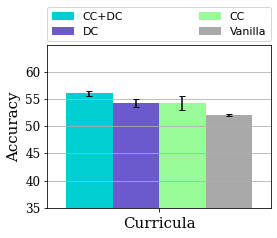

In [28]:
make_fig_bar(table_av, table_sd, 
             'ablation')

In [29]:
# font = {'family': 'serif',
#         'weight': 'normal',
#         }
# fontsize = 10 # axes fontsize

# x_label = ["100", "200", "400", "800"]
# y_min   = 10
# y_max   = 55
# y_step  = 5

# linewidth = 2

# color_curr_mean = 'green'
# color_curr_sd   = 'palegreen'

# color_anti_mean = 'darkviolet'
# color_anti_sd   = 'plum'

# color_rand_mean = 'darkblue'
# color_rand_sd   = 'paleturquoise'

# color_vanilla_mean = 'red'
# color_vanilla_sd   = 'pink'

In [30]:
# def make_fig_line(mean, sd, name):
    
#     fig, ax = plt.subplots(figsize =(9.5, 7.5), nrows=1, sharex=True)
    
#     x = np.array(x_label)

#     order_idx = 0 # curr
#     y = np.array(mean[:, order_idx])
#     error = np.array(sd[:, order_idx])
#     ax.plot(x, y, color=color_curr_mean, label="curr", linewidth=linewidth)
#     ax.fill_between(x, y-error, y+error,
#         alpha=0.5, edgecolor=color_curr_sd, facecolor=color_curr_sd)


#     order_idx = 1 # anti
#     y = np.array(mean[:, order_idx])
#     error = np.array(sd[:, order_idx])
#     ax.plot(x, y, color=color_anti_mean, label="anti", linewidth=linewidth)
#     ax.fill_between(x, y-error, y+error,
#         alpha=0.5, edgecolor=color_anti_sd, facecolor=color_anti_sd)


#     order_idx = 2 # rand
#     y = np.array(mean[:, order_idx])
#     error = np.array(sd[:, order_idx])
#     ax.plot(x, y, color=color_rand_mean, label="rand", linewidth=linewidth)
#     ax.fill_between(x, y-error, y+error,
#         alpha=0.5, edgecolor=color_rand_sd, facecolor=color_rand_sd)


#     order_idx = 3 # vanilla
#     y = np.array(mean[:, order_idx])
#     error = np.array(sd[:, order_idx])
#     ax.plot(x, y, color=color_vanilla_mean, label="vanilla", linewidth=linewidth)
#     ax.fill_between(x, y-error, y+error,
#         alpha=0.5, edgecolor=color_vanilla_sd, facecolor=color_vanilla_sd)


#     ax.set_xticklabels(x_label, fontdict=font, fontsize=fontsize, rotation=0)
#     ax.set_yticks(np.arange(y_min, y_max, y_step))
#     yticks = [str(el) for el in np.arange(y_min, y_max, y_step)]
#     ax.set_yticklabels(yticks, fontsize=fontsize, fontdict=font, color='black')

#     ax.grid(b=True, which='major', axis='both')
#     ax.legend(loc="lower left")
#     ax.margins(x=0)
#     figure = plt.gcf()
#     figure.set_size_inches(3.5, 2.5)
#     plt.subplots_adjust(hspace = 0.01)
#     fig.savefig('../figures/' + name + '_line.eps', format='eps', dpi=1000, bbox_inches='tight')
#     plt.show()

In [31]:
# make_fig_line(table_av, table_sd, 
#               'cifar10_niid2_0.8a_0.2b_fedavg_partitions')